<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Cryptocurrency_price_forecasting/blob/main/Cryptocurrency_price_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cryptocurrencies are fast becoming rivals to traditional currency across the world. The digital currencies are available to purchase in many different places, making it accessible to everyone, and with retailers accepting various cryptocurrencies it could be a sign that money as we know it is about to go through a major change.

In addition, the blockchain technology on which many cryptocurrencies are based, with its revolutionary distributed digital backbone, has many other promising applications. Implementations of secure, decentralized systems can aid us in conquering organizational issues of trust and security that have plagued our society throughout the ages. In effect, we can fundamentally disrupt industries core to economies, businesses and social structures, eliminating inefficiency and human error.

Content
The dataset contains all historical daily prices (open, high, low, close) for all cryptocurrencies listed on CoinMarketCap.

# Connecting with the kaggle and importing the data

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
# Loading the data from kaggle
!kaggle datasets download -d taniaj/cryptocurrency-market-history-coinmarketcap

Dataset URL: https://www.kaggle.com/datasets/taniaj/cryptocurrency-market-history-coinmarketcap
License(s): CC0-1.0
  0% 0.00/13.4M [00:00<?, ?B/s]
100% 13.4M/13.4M [00:00<00:00, 1.23GB/s]


In [8]:
# unzipping the data
!unzip cryptocurrency-market-history-coinmarketcap.zip

Archive:  cryptocurrency-market-history-coinmarketcap.zip
  inflating: all_currencies.csv      


In [9]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('all_currencies.csv')

In [11]:
df.head(5)

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df.head(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [14]:
df.tail(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
632213,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
632214,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
632215,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
632216,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0
632217,2018-09-27,ZZC,0.086664,0.130541,0.067363,0.073475,91.0,168691.0


In [15]:
df.sample(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
334377,2013-12-05,MEC,1.820000,2.050000,1.280000,1.720000,NaN,38496300.0
315695,2017-03-10,LOG,0.019137,0.020442,0.017333,0.017968,31.0,153768.0
39131,2017-08-31,ATMOS,0.027401,0.032117,0.025865,0.026695,4672.0,2745254.0
219336,2018-02-08,FJC,0.001288,0.001522,0.001241,0.001360,4808.0,1672958.0
619551,2018-06-11,XZC,25.320000,25.440000,23.200000,23.680000,1142090.0,125132472.0


In [16]:
df['Symbol'].value_counts()

,count
Symbol,
BTC,1979
NMC,1979
LTC,1979
NVC,1978
PPC,1978
...,...
MNP,2
PHON,2
DACH,2


#Extracting the bitcoin data only

In [17]:
btc_df = df[df['Symbol'] == 'BTC']

In [18]:
btc_df.sample(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
89329,2015-05-02,BTC,232.34,235.73,232.34,234.93,12535500.0,3.279270e+09
89736,2016-06-12,BTC,609.68,684.84,607.04,672.78,277084992.0,9.539850e+09
89001,2014-06-08,BTC,654.99,658.88,653.47,656.14,8614190.0,8.428530e+09
90113,2017-06-24,BTC,2738.52,2757.94,2583.19,2608.72,982750016.0,4.493290e+10
89983,2017-02-14,BTC,991.73,1011.51,986.47,1004.55,137946000.0,1.602800e+10


In [19]:
btc_df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [20]:
# dropping the volume and market cap columns
btc_df.drop(['Volume', 'Market Cap'], axis=1, inplace=True)

In [21]:
btc_df.sample(5)

,Date,Symbol,Open,High,Low,Close
90168,2017-08-18,BTC,4324.34,4370.13,4015.40,4160.62
88768,2013-10-18,BTC,146.37,155.96,145.57,155.96
90409,2018-04-16,BTC,8337.57,8371.15,7925.73,8058.67
90562,2018-09-16,BTC,6536.68,6544.33,6460.10,6517.18
88711,2013-08-22,BTC,123.30,123.50,120.60,121.15


In [22]:
btc_df.shape

(1979, 6)

In [23]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 88595 to 90573
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1979 non-null   object 
 1   Symbol  1979 non-null   object 
 2   Open    1979 non-null   float64
 3   High    1979 non-null   float64
 4   Low     1979 non-null   float64
 5   Close   1979 non-null   float64
dtypes: float64(4), object(2)
memory usage: 108.2+ KB


In [24]:
btc_df.isna().sum()

,0
Date,0
Symbol,0
Open,0
High,0
Low,0
Close,0


In [25]:
btc_df.duplicated().sum()

np.int64(0)

In [26]:
btc_df.Date = pd.to_datetime(btc_df.Date)

In [27]:
btc_df = btc_df.set_index('Date')

In [28]:
btc_df.sample(5)

,Symbol,Open,High,Low,Close
Date,,,,,
2014-05-31,BTC,615.69,624.72,604.47,623.68
2015-04-08,BTC,253.06,253.85,244.21,245.02
2015-04-24,BTC,235.97,236.30,229.93,231.27
2017-05-23,BTC,2191.56,2320.82,2178.50,2320.42
2016-11-08,BTC,703.09,712.99,702.39,709.85


In [29]:
btc_df.describe()

,Open,High,Low,Close
count,1979.000000,1979.000000,1979.000000,1979.000000
mean,2165.487388,2234.527827,2088.606306,2168.580111
std,3422.262088,3552.409881,3264.080028,3423.188587
min,68.500000,74.560000,65.530000,68.430000
25%,311.045000,317.005000,295.315000,311.240000
50%,585.950000,594.460000,574.600000,586.670000
75%,1958.430000,2071.750000,1873.040000,1993.285000
max,19475.800000,20089.000000,18974.100000,19497.400000


#Stationary check and seasonal decomposition


If a timeseries is a stationary then it implies mean and variance are constant in time. This is a important step in timeseries analysis.
Seasonal decomposition is a method in statsmodel to decompose time series in the 4 components such as stationary, Trend, seasonal and residual.

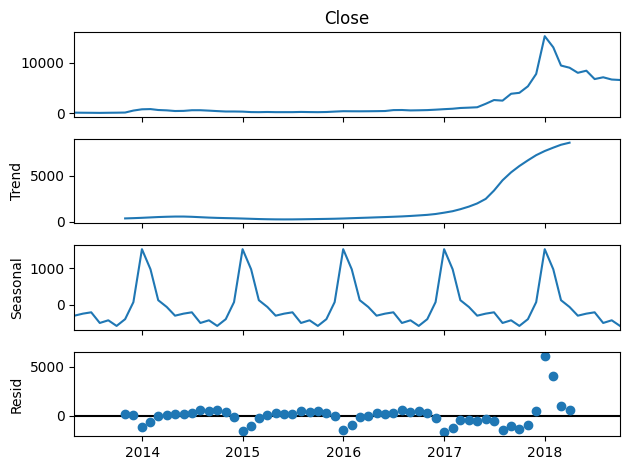

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose


from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure the DataFrame is sorted by date
btc_df = btc_df.sort_index()

# Resample to monthly Close prices and drop missing values
monthly_close = btc_df['Close'].resample('M').mean().dropna()

# Perform seasonal decomposition
result = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot full decomposition (trend, seasonal, residual)
result.plot()
plt.tight_layout()
plt.show()


In [37]:
print(type(result))

<class 'tuple'>


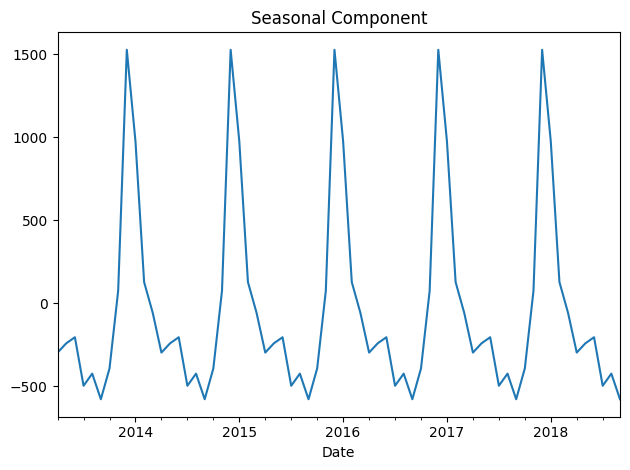

In [40]:
# Plot only the seasonal component
result.seasonal.plot(title='Seasonal Component')
plt.tight_layout()
plt.show()

The seasonal commponent repeat after each year on a yearly basis. "There’s a repeating seasonal pattern every 12 periods.”

In [41]:
from statsmodels.tsa.stattools import adfuller


# Run ADF test on 'Close' prices
result = adfuller(monthly_close)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -1.147333301926855
p-value: 0.6958317999669209
Critical Values:
   1%: -3.5352168748293127
   5%: -2.9071540828402367
   10%: -2.5911025443786984


| Output              | Interpretation                                                                                                                                |
| ------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **ADF Statistic**   | The test statistic. Should be **less than** the critical value to reject the null hypothesis (i.e., detect stationarity).                     |
| **p-value**         | If **< 0.05**, the series is likely **stationary** (no unit root).                                                                            |
| **Critical Values** | Benchmarks at 1%, 5%, and 10% confidence levels. If ADF stat is **less than** these values, the null hypothesis (non-stationary) is rejected. |


📉 Interpretation
❌ The series is not stationary.

Why?

p-value = 0.6958 → much higher than 0.05 → fail to reject the null hypothesis (that the series has a unit root).

ADF Statistic = -1.1473, which is greater than all the critical values (1%, 5%, 10%).

So the test suggests monthly BTC Close prices are non-stationary — which is very common for financial time series (they usually have trends or seasonality).